In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Reading

In [17]:
loan = pd.read_csv("loan.csv")

In [18]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Inspecting

In [23]:
loan.shape

(39717, 111)

In [24]:
# Inspect data types and check for missing values
data_info = loan.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [25]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [80]:
df = pd.read_csv("loan.csv",usecols=['id', 'loan_status'])

print(df)

            id  loan_status
0      1077501   Fully Paid
1      1077430  Charged Off
2      1077175   Fully Paid
3      1076863   Fully Paid
4      1075358      Current
...        ...          ...
39712    92187   Fully Paid
39713    90665   Fully Paid
39714    90395   Fully Paid
39715    90376   Fully Paid
39716    87023   Fully Paid

[39717 rows x 2 columns]


In [91]:
# replacing values
df['loan_status'].replace(['Fully Paid', 'Current', 'Charged Off'], [0, 0, 1], inplace=True) 
print(df)


            id  loan_status
0      1077501            0
1      1077430            1
2      1077175            0
3      1076863            0
4      1075358            0
...        ...          ...
39712    92187            0
39713    90665            0
39714    90395            0
39715    90376            0
39716    87023            0

[39717 rows x 2 columns]


In [54]:
#get the list of columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                      object
tot_hi_cred_lim                object
total_bal_ex_mort              object
total_bc_limit                 object
total_il_high_credit_limit     object
Length: 111, dtype: object

In [26]:
# Cleaning

In [55]:
#get list of unique variables per column
print(loan.nunique())

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         2
tot_hi_cred_lim                   1
total_bal_ex_mort                 1
total_bc_limit                    1
total_il_high_credit_limit        1
Length: 111, dtype: int64


In [27]:
missing_values = loan.isnull().sum()
missing_values

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [28]:
# Handling missing values

# Replace missing values with "Unknown"
loan['tax_liens'].fillna('Unknown', inplace=True)

loan['tot_hi_cred_lim'].fillna('Unknown', inplace=True)

loan['total_bal_ex_mort'].fillna('Unknown', inplace=True)

loan['total_bc_limit'].fillna('Unknown', inplace=True)

loan['total_il_high_credit_limit'].fillna('Unknown', inplace=True)

# Check for remaining missing values
missing_values_after_cleaning = loan.isnull().sum()
missing_values_after_cleaning

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 111, dtype: int64

In [45]:
# Verify data types and handle any corrections if needed
loan['loan_status'] = loan['loan_status'].astype('category')

loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                      object
tot_hi_cred_lim                object
total_bal_ex_mort              object
total_bc_limit                 object
total_il_high_credit_limit     object
Length: 111, dtype: object

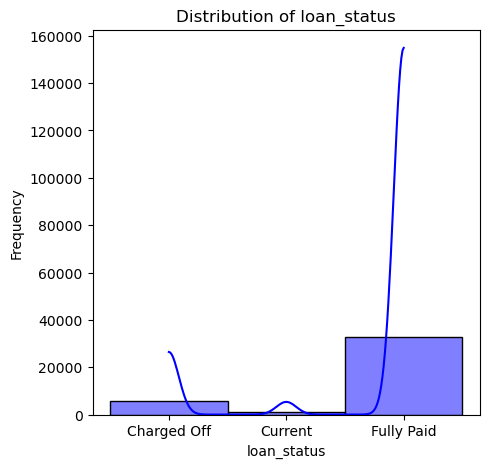

In [77]:
# Univariate Analysis
# 1. Distribution of laon_status
plt.figure(figsize=(5, 5))
sns.histplot(loan['loan_status'], kde=True, bins=1, color="blue")
plt.title("Distribution of loan_status")
plt.xlabel("loan_status")
plt.ylabel("Frequency")
plt.show()


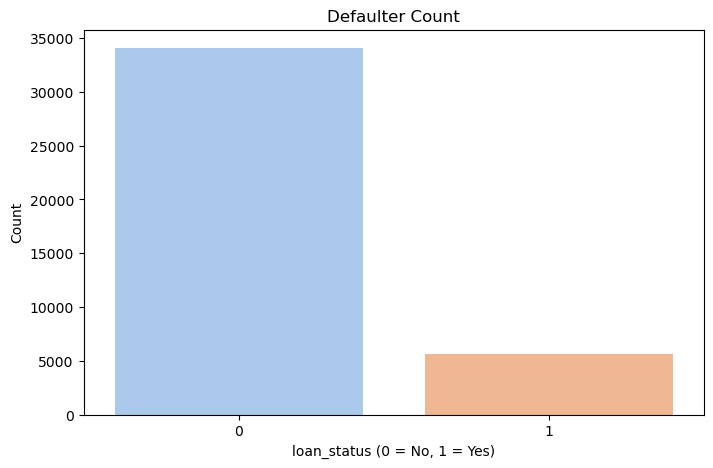

In [94]:
# 1. Countplot of Defaulters
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df, palette="pastel")
plt.title("Defaulter Count")
plt.xlabel("loan_status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()